<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run). 

## 🤓 Case Study: India Aadhaar Card Extraction

In this notebook, we'll walk through an example of extracting structured data from Indian Aadhaar images using VLM Run.

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [ ]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet
! pip install dotenv

In [ ]:
from dotenv import load_dotenv

load_dotenv()

In [7]:
! pip install pandas google-cloud-storage openai --quiet

In [8]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

In [ ]:
import pandas as pd
from PIL import Image

from vlmrun.common.image import encode_image
from vlmrun.common.utils import remote_image

In [ ]:
image_urls = []

In [22]:
df = pd.DataFrame({
    "image_path": image_urls,
    "image": [remote_image(url) for url in image_urls]
})

print(f"Loaded {len(image_urls)} aadhaar images")
df.head()

Loaded 1 aadhaar images


,image_path,image
0,https://imgv2-1-f.scribdassets.com/img/documen...,<PIL.Image.Image image mode=RGB size=768x1024 ...


In [ ]:
from IPython.display import HTML, display

formatters = {
    "image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='400'>"
}
cols = ["image_path", "image"]
display(HTML(df[cols].head(n=10).to_html(formatters=formatters, escape=False)))

In [ ]:
from vlmrun.client import VLMRun

client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)
client

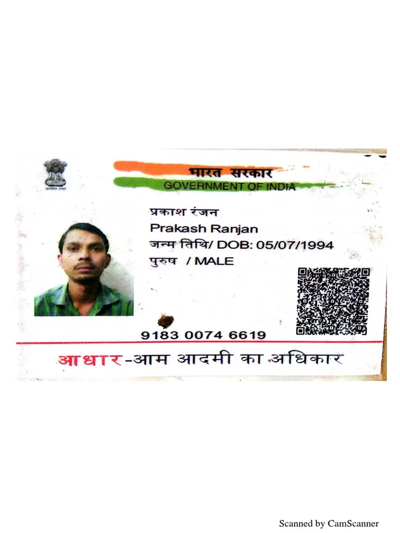

{
  "id": "6535e57c-1f6d-4cee-9151-42c0c944d46c",
  "created_at": "2025-05-07T05:55:47.577217",
  "completed_at": "2025-05-07T05:55:52.143556Z",
  "response": {
    "detected_side": "front",
    "aadhaar_number": "9183 0074 6619",
    "name": "Prakash Ranjan",
    "date_of_birth": "05/07/1994",
    "gender": "Male",
    "address": null,
    "has_photo": true,
    "has_qr_code": true,
    "has_emblem": true,
    "has_uidai_logo": null,
    "issue_date": null,
    "print_date": null,
    "languages": [
      "Hindi",
      "English"
    ]
  },
  "status": "completed",
  "usage": {
    "elements_processed": 1,
    "element_type": "image",
    "credits_used": 1
  }
}


In [ ]:
# Display  image
image = df["image"][0]
W, H = image.size
display(image.resize((400, int(400 * H / W))))

# Generate the response 
response = client.image.generate(
    images=[image],
    domain="document.in-aadhaar-card"
)
print(response.model_dump_json(indent=2))